In [2]:
import h2o
import numpy as np
import pandas as pd
import seaborn as sns
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
h2o.init(nthreads=-1, max_mem_size=9)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 25 mins
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_mujin_osvawf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.76 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
data1 = "https://raw.githubusercontent.com/Nyscrodia/WeatherForecasting/master/time_data/ASOS_TIM.csv"
data2 = "https://raw.githubusercontent.com/Nyscrodia/WeatherForecasting/master/time_data/binary.csv"
df1 = h2o.import_file(data1)
df2 = h2o.import_file(data2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
df1.describe()

Rows:8760
Cols:17

,spot,spotName,date,Ta,Rn(mm),Ws(m/s),Wd(16D),Hm(%),Pa(hPa),Ps(hPa),Ss(hr),Gsr(MJ/m2),Snow(cm),DpthFhsc(cm),Tca(10),CloudForm,Ts
type,int,enum,string,real,int,real,int,int,real,real,real,real,real,real,int,enum,real
mins,108.0,,NaN,-18.5,0.0,0.0,0.0,19.0,986.9,996.5,0.0,0.0,0.0,0.0,0.0,,-12.7
mean,108.0,,NaN,13.736678082191784,1.256059009483667,2.311269696277689,169.66773235898606,65.58926940639269,1006.047785388128,1016.2816210045662,0.4583802963890627,1.0767063243581716,1.3976253298153036,0.9620689655172413,4.959922356702444,,14.731844660194177
maxs,108.0,,NaN,36.3,65.0,8.3,360.0,100.0,1025.8,1037.4,1.0,3.74,5.1,4.4,10.0,,56.8
sigma,0.0,,NaN,10.896708289692606,3.4373196401775754,1.1208549527775016,107.5469697500971,18.39322668572162,7.928486283081569,8.312023328685694,0.43878771863515936,0.9664399973272517,1.3573899857950176,1.4241322654022013,3.92938893199948,,12.043577117923805
zeros,0,,0,16,602,8,181,0,0,0,1824,167,17,9,2405,,31
missing,0,0,0,0,7811,2,2,0,0,0,3969,3969,8381,8731,2,3813,5
0,108.0,Seoul,2021-01-01 0:00,-8.3,nan,1.8,250.0,66.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.8
1,108.0,Seoul,2021-01-01 1:00,-8.7,nan,2.4,270.0,68.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.9
2,108.0,Seoul,2021-01-01 2:00,-9.1,nan,1.6,270.0,69.0,1016.2,1027.5,nan,nan,nan,nan,0.0,,-7.1


In [5]:
df2.describe()

Rows:8760
Cols:18

,C1,spot,spotName,date,Ta,Rn(mm),Ws(m/s),Wd(16D),Hm(%),Pa(hPa),Ps(hPa),Ss(hr),Gsr(MJ/m2),Snow(cm),DpthFhsc(cm),Tca(10),CloudForm,Ts
type,int,int,enum,string,real,int,real,int,int,real,real,real,real,real,real,int,enum,real
mins,0.0,108.0,,NaN,-18.5,0.0,0.0,0.0,19.0,986.9,996.5,0.0,0.0,0.0,0.0,0.0,,-12.7
mean,4379.5,108.0,,NaN,13.73667808219178,0.03961187214611872,2.311269696277689,169.66773235898606,65.58926940639269,1006.0477853881279,1016.2816210045662,0.4583802963890629,1.0767063243581716,1.397625329815303,0.9620689655172413,4.959922356702443,,14.731844660194175
maxs,8759.0,108.0,,NaN,36.3,1.0,8.3,360.0,100.0,1025.8,1037.4,1.0,3.74,5.1,4.4,10.0,,56.8
sigma,2528.9385124988708,0.0,,NaN,10.896708289692604,0.1950566969093021,1.1208549527775014,107.5469697500971,18.39322668572161,7.92848628308167,8.312023328685779,0.4387877186351594,0.9664399973272516,1.3573899857950176,1.4241322654022013,3.92938893199948,,12.043577117923805
zeros,1,0,,0,16,8413,8,181,0,0,0,1824,167,17,9,2405,,31
missing,0,0,0,0,0,0,2,2,0,0,0,3969,3969,8381,8731,2,3813,5
0,0.0,108.0,Seoul,2021-01-01 0:00,-8.3,0.0,1.8,250.0,66.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.8
1,1.0,108.0,Seoul,2021-01-01 1:00,-8.7,0.0,2.4,270.0,68.0,1016.4,1027.7,nan,nan,nan,nan,0.0,,-6.9
2,2.0,108.0,Seoul,2021-01-01 2:00,-9.1,0.0,1.6,270.0,69.0,1016.2,1027.5,nan,nan,nan,nan,0.0,,-7.1


C:\Users\mujin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\mujin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\mujin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\mujin\AppData\Roaming\Python\Python39\site-packages\

<Figure size 640x480 with 0 Axes>

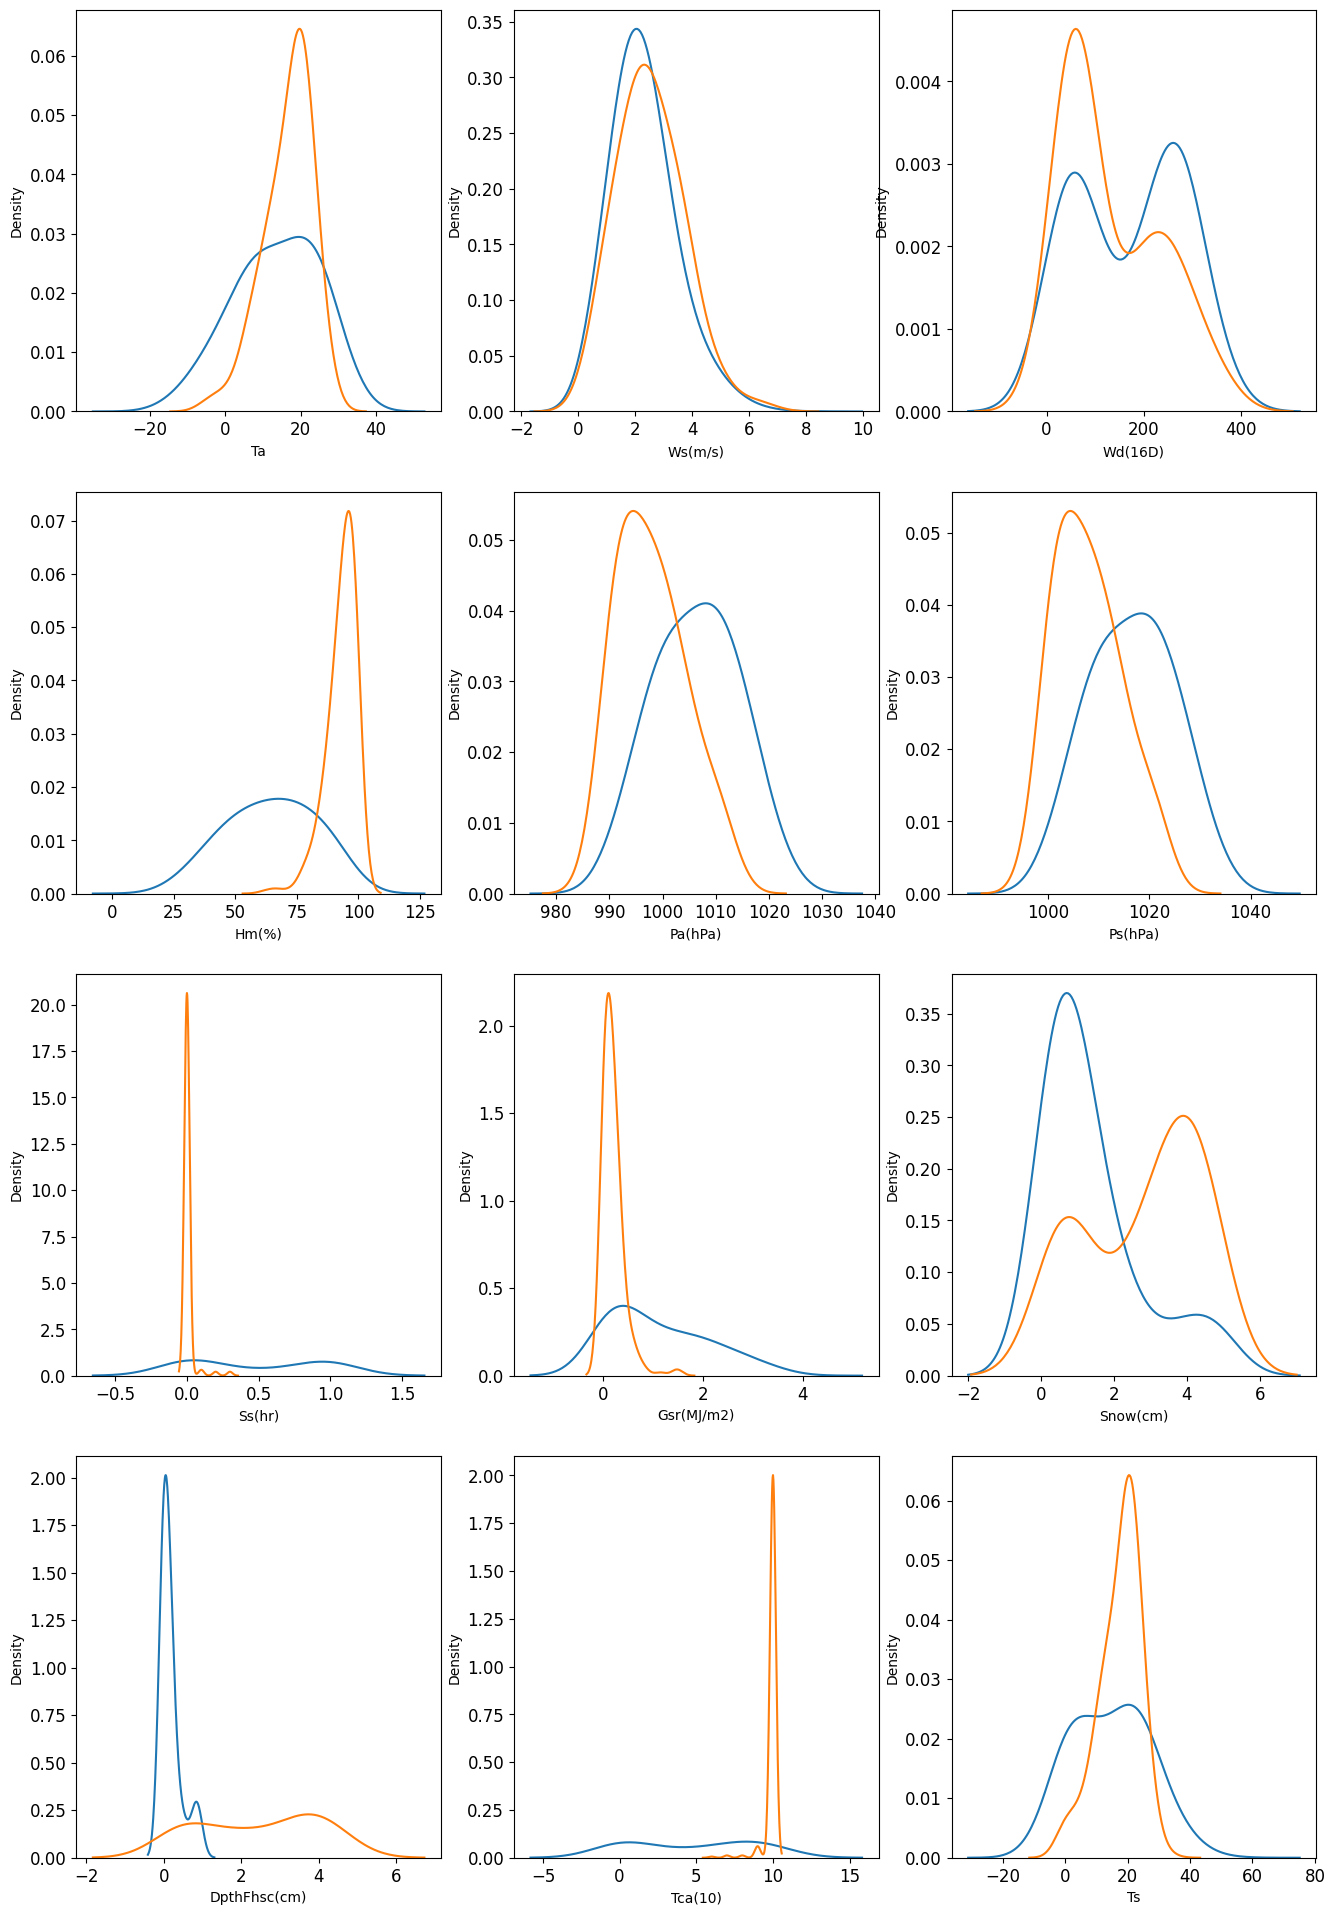

In [10]:
features = [f for f in df1.columns if f not in ['spot', 'spotName', 'date', 'Rn(mm)', 'CloudForm']]

i = 0
t0 = df2[df2['Rn(mm)'] == 0].as_data_frame()
t1 = df2[df2['Rn(mm)'] == 1].as_data_frame()

# sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(4,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

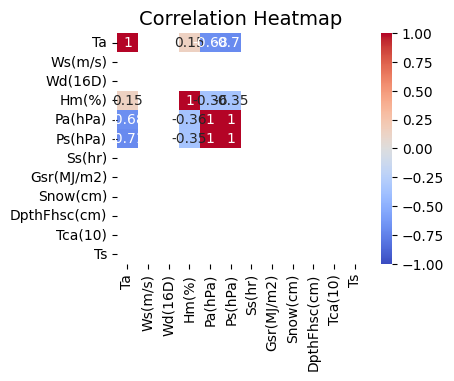

In [12]:
plt.figure(figsize=(4,3))
corr = df2[features].cor().as_data_frame()
corr.index = features
sns.heatmap(corr, annot = True, cmap='coolwarm', linecolor="white",
            vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()